# Details

In [61]:
import pandas as pd
import numpy as np

In [62]:
# read in csv file
box_game_data_merged = pd.read_csv('../phase4/cleaned-data/box_game_data_merged.csv')
box_game_data_merged = box_game_data_merged.drop(columns=['Unnamed: 0'])

box_game_data_merged.head()

,date,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,...,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,stadium,weather_temperature,weather_wind_mph,winner_id
0,2010-09-09,12,253,51,5.0,26.283333,18,308,62,5.0,...,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,Louisiana Superdome,72.0,0.0,0
1,2010-09-12,25,463,69,6.7,29.116667,23,355,61,5.8,...,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,Reliant Stadium,89.0,5.0,0
2,2010-09-12,13,168,57,2.9,25.300000,23,463,70,6.6,...,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,Soldier Field,75.0,1.0,0
3,2010-09-12,21,378,64,5.9,27.150000,20,325,81,4.0,...,St. Louis Rams,13,17,Arizona Cardinals,ARI,-3.0,Edward Jones Dome,72.0,0.0,1
4,2010-09-12,14,237,63,3.8,25.350000,21,376,67,5.6,...,New York Giants,31,18,Carolina Panthers,NYG,-6.0,MetLife Stadium,65.0,1.0,0


In [63]:
def get_last_n_games_stats(team_id, date, n):
  last_n_games = box_game_data_merged[(box_game_data_merged["home_id"] == team_id) | (box_game_data_merged["away_id"] == team_id)]
  last_n_games = last_n_games[last_n_games["date"] < date].tail(n)
  if len(last_n_games) < n:
    return None
  else:
    total_points_scored = 0
    total_points_allowed = 0
    total_first_downs = 0
    total_net_yards = 0
    total_total_plays = 0
    total_avg_gain = 0
    for index, row in last_n_games.iterrows():
        if row["home_id"] == team_id:
            total_points_scored += row["score_home"]
            total_points_allowed += row["score_away"]
            total_first_downs += row["home_first_downs"]
            total_net_yards += row["home_net_yards"]
            total_total_plays += row["home_total_plays"]
            total_avg_gain += row["home_avg_gain"]
        else:
            total_points_scored += row["score_away"]
            total_points_allowed += row["score_home"]
            total_first_downs += row["visitor_first_downs"]
            total_net_yards += row["visitor_net_yards"]
            total_total_plays += row["visitor_total_plays"]
            total_avg_gain += row["visitor_avg_gain"]
    return [total_points_scored/n, total_points_allowed/n, total_first_downs/n, total_net_yards/n, total_total_plays/n, total_avg_gain/n]

In [64]:
# create a new data frame that has date, home_id, away_id, home_last_n_games_stats, away_last_n_games_stats
def create_last_n_games_stats_df(n):
    last_n_games_stats = pd.DataFrame(columns=["date", "home_id", "away_id", "home_last_n_score", "home_last_n_allowed", "home_last_n_time_of_possession", 
                                            "home_last_n_first_downs", "home_last_n_total_plays", "home_last_n_avg_gain", "away_last_n_score", "away_last_n_allowed", 
                                            "away_last_n_time_of_possession", "away_last_n_first_downs", "away_last_n_total_plays", "away_last_n_avg_gain"])
    # go through each row in the original data frame and call the get_last_n_games_stats function 
    for index, row in box_game_data_merged.iterrows():
        home_last_n_games_stats = get_last_n_games_stats(row["home_id"], row["date"], n)
        away_last_n_games_stats = get_last_n_games_stats(row["away_id"], row["date"], n)
        if home_last_n_games_stats is not None and away_last_n_games_stats is not None:
            last_n_games_stats = pd.concat([last_n_games_stats, pd.DataFrame({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_n_score": home_last_n_games_stats[0], 
                                                            "home_last_n_allowed": home_last_n_games_stats[1], "home_last_n_time_of_possession": home_last_n_games_stats[2], 
                                                            "home_last_n_first_downs": home_last_n_games_stats[3], "home_last_n_total_plays": home_last_n_games_stats[4], 
                                                            "home_last_n_avg_gain": home_last_n_games_stats[5], "away_last_n_score": away_last_n_games_stats[0], 
                                                            "away_last_n_allowed": away_last_n_games_stats[1], "away_last_n_time_of_possession": away_last_n_games_stats[2], 
                                                            "away_last_n_first_downs": away_last_n_games_stats[3], "away_last_n_total_plays": away_last_n_games_stats[4], 
                                                            "away_last_n_avg_gain": away_last_n_games_stats[5]}, index=[0])], ignore_index=True)
        else:
            last_n_games_stats = pd.concat([last_n_games_stats, pd.DataFrame({"date": row["date"], "home_id": row["home_id"], "away_id": row["away_id"], "home_last_n_score": None, 
                                                            "home_last_n_allowed": None, "home_last_n_time_of_possession": None, "home_last_n_first_downs": None, 
                                                            "home_last_n_total_plays": None, "home_last_n_avg_gain": None, "away_last_n_score": None, 
                                                            "away_last_n_allowed": None, "away_last_n_time_of_possession": None, "away_last_n_first_downs": None, 
                                                            "away_last_n_total_plays": None, "away_last_n_avg_gain": None}, index=[0])], ignore_index=True)
    return last_n_games_stats


In [65]:
last_5_games_stats = create_last_n_games_stats_df(5)
last_5_games_stats.tail()

,date,home_id,away_id,home_last_n_score,home_last_n_allowed,home_last_n_time_of_possession,home_last_n_first_downs,home_last_n_total_plays,home_last_n_avg_gain,away_last_n_score,away_last_n_allowed,away_last_n_time_of_possession,away_last_n_first_downs,away_last_n_total_plays,away_last_n_avg_gain
1912,2017-10-01,TB,NYG,21.4,22.8,19.8,315.6,59.6,5.36,13.8,23.6,16.0,323.0,60.6,5.30
1913,2017-10-01,DEN,LVR,23.2,20.6,20.2,332.4,66.2,4.98,20.2,22.8,15.4,264.2,57.0,4.64
1914,2017-10-01,SEA,IND,18.8,20.2,19.6,333.2,64.8,5.16,20.4,28.6,17.6,320.0,60.4,5.36
1915,2017-10-02,KC,WAS,29.2,20.4,20.0,356.8,55.2,6.36,24.4,20.0,18.4,376.6,62.4,6.02
1916,2017-10-05,TB,NE,22.4,22.2,20.6,347.2,60.2,5.82,32.6,31.2,27.2,448.2,73.2,6.16


In [66]:
# merge the last_5_games_stats dataset with the box_game_data_merged dataset on date, home_id, and away_id
box_game_data_merged_last_5 = pd.merge(box_game_data_merged, last_5_games_stats, how="inner", left_on=["date", "home_id", "away_id"], right_on=["date", "home_id", "away_id"])
box_game_data_merged_last_5.head()

,date,visitor_first_downs,visitor_net_yards,visitor_total_plays,visitor_avg_gain,visitor_time_of_possession,home_first_downs,home_net_yards,home_total_plays,home_avg_gain,...,home_last_n_time_of_possession,home_last_n_first_downs,home_last_n_total_plays,home_last_n_avg_gain,away_last_n_score,away_last_n_allowed,away_last_n_time_of_possession,away_last_n_first_downs,away_last_n_total_plays,away_last_n_avg_gain
0,2010-09-09,12,253,51,5.0,26.283333,18,308,62,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-12,25,463,69,6.7,29.116667,23,355,61,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-12,13,168,57,2.9,25.300000,23,463,70,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-12,21,378,64,5.9,27.150000,20,325,81,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-12,14,237,63,3.8,25.350000,21,376,67,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Train Model

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

### Explained Model

In [68]:
df_box_game = box_game_data_merged[:1500].copy()

X_train = df_box_game[['home_id', 'away_id', 'visitor_net_yards', 'visitor_time_of_possession', 'home_net_yards', 'home_time_of_possession', 'score_home', 'score_away']]
y_train = df_box_game["winner_id"]

ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 20),
        "kneighborsregressor__metric": ["euclidean", "manhattan"]
    },
    scoring="neg_root_mean_squared_error",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=10))])

In [69]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003885,0.000685,0.006204,0.001127,euclidean,1,"{'kneighborsregressor__metric': 'euclidean', '...",-0.577350,-0.559762,-0.605530,-0.583095,-0.571548,-0.541603,-0.565685,-0.529150,-0.535413,-0.547723,-0.561686,0.022561,38
1,0.003517,0.000368,0.005435,0.000816,euclidean,2,"{'kneighborsregressor__metric': 'euclidean', '...",-0.484768,-0.479583,-0.503322,-0.483046,-0.509902,-0.426224,-0.509902,-0.454606,-0.433974,-0.474342,-0.475967,0.028087,36
2,0.004012,0.000349,0.006359,0.000415,euclidean,3,"{'kneighborsregressor__metric': 'euclidean', '...",-0.457044,-0.470618,-0.453791,-0.479969,-0.480740,-0.414550,-0.495162,-0.426875,-0.407340,-0.446385,-0.453247,0.028090,34
3,0.003730,0.000342,0.006526,0.000526,euclidean,4,"{'kneighborsregressor__metric': 'euclidean', '...",-0.444410,-0.451848,-0.456435,-0.459619,-0.456435,-0.411805,-0.483477,-0.408758,-0.420813,-0.441116,-0.443472,0.022350,33
4,0.003446,0.000249,0.005397,0.000650,euclidean,5,"{'kneighborsregressor__metric': 'euclidean', '...",-0.435125,-0.435125,-0.430813,-0.430813,-0.449296,-0.399333,-0.453725,-0.390555,-0.402989,-0.451073,-0.427885,0.021481,31


In [70]:
df_cv_results["param_kneighborsregressor__n_neighbors"] = df_cv_results["param_kneighborsregressor__n_neighbors"].astype("int")

df_cv_results.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

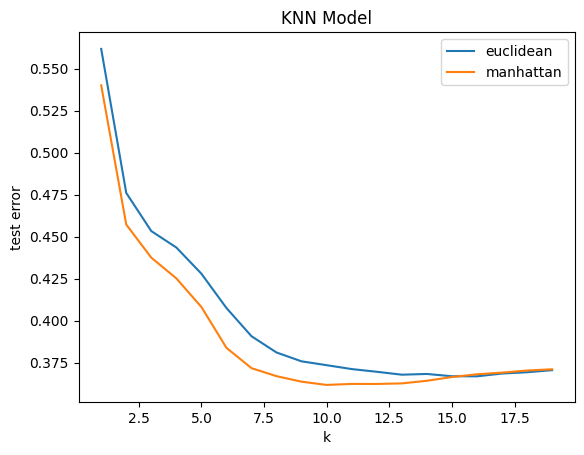

In [71]:
df_cv_results["pos_mean_test_score"] = -df_cv_results["mean_test_score"]

(df_cv_results.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", 
                                                                                                title = "KNN Model",
                                                                                                legend = True)

In [72]:
cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_74166/2256501085.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



0.3616783691950907

In [73]:
df_box_game_test = box_game_data_merged[1500:].copy()

In [74]:
y_new = pd.Series(
    grid_search.best_estimator_.predict(X=df_box_game_test[['home_id', 'away_id', 'visitor_net_yards', 'visitor_time_of_possession', 'home_net_yards', 'home_time_of_possession', 'score_home', 'score_away']]),
    index=df_box_game_test.index
)

y_new

1500    0.2
1501    0.0
1502    0.4
1503    0.6
1504    0.0
       ... 
1912    0.6
1913    0.3
1914    0.0
1915    0.0
1916    0.7
Length: 417, dtype: float64

In [75]:
pred_vs_actual = pd.DataFrame({
    "Winner_pred": y_new,
    "Winner_actual": df_box_game_test["winner_id"],
    "Home_Team": df_box_game_test["home_id"],
    "Away_Team": df_box_game_test["away_id"]
})

pred_vs_actual["Winner_pred"] = pred_vs_actual["Winner_pred"].apply(lambda x: 0 if x < 0.5 else 1)
pred_vs_actual.count()

Winner_pred      417
Winner_actual    417
Home_Team        417
Away_Team        417
dtype: int64

In [76]:
pred_vs_actual[pred_vs_actual["Winner_pred"] == pred_vs_actual["Winner_actual"]].count()

Winner_pred      340
Winner_actual    340
Home_Team        340
Away_Team        340
dtype: int64

### Predict Model

In [77]:
# drop rows with null values
df_prediction = box_game_data_merged_last_5.copy()
df_prediction.dropna(inplace=True)
df_prediction.shape

(1799, 37)

##### KNeighborsRegressor for Multi Output

In [78]:
df_last_5 = df_prediction[:1500].copy()

X_train = df_last_5[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                     'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                     'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]
y_train = df_last_5[['score_home', 'score_away']]

ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 60),
        "kneighborsregressor__metric": ["euclidean", "manhattan"]
    },
    scoring="neg_root_mean_squared_error",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=50))])

param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

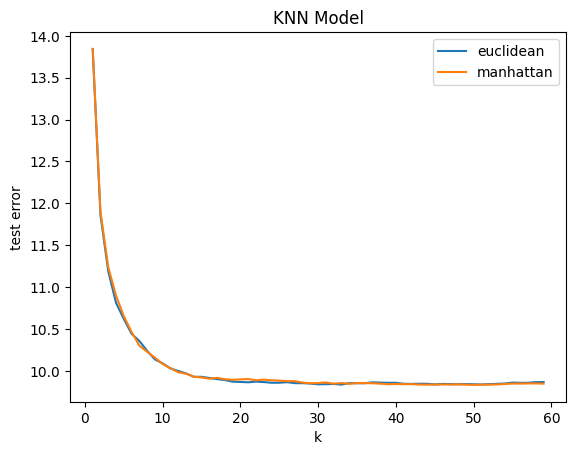

In [79]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)

df_cv_results["param_kneighborsregressor__n_neighbors"] = df_cv_results["param_kneighborsregressor__n_neighbors"].astype("int")

df_cv_results.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

df_cv_results["pos_mean_test_score"] = -df_cv_results["mean_test_score"]

(df_cv_results.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error",
                                                                                                title = "KNN Model",
                                                                                                legend = True)

In [80]:
cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train,
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

9.831834918186178

In [81]:
df_last_5_test = df_prediction[1500:].copy()

y_new = pd.DataFrame(
    grid_search.best_estimator_.predict(X=df_last_5_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=df_last_5_test.index
)

y_new

,0,1
1618,25.84,21.32
1619,23.64,23.76
1620,23.24,26.70
1621,24.28,20.46
1622,23.30,24.08
...,...,...
1912,23.70,20.74
1913,25.18,19.42
1914,26.80,18.10
1915,24.00,19.76


In [82]:
# compare the predicted scores to the actual scores with the date, home team, and away team, score_home, and score_away, and the predicted scores
pred_vs_actual_knr = pd.DataFrame({
    "Date": df_last_5_test["date"],
    "Home_Team": df_last_5_test["home_id"],
    "Away_Team": df_last_5_test["away_id"],
    "Score_Home": df_last_5_test["score_home"],
    "Score_Away": df_last_5_test["score_away"],
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1],
    "Winner_Id": df_last_5_test["winner_id"]
})

pred_vs_actual_knr.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id
1618,2016-09-18,DEN,IND,34,20,25.84,21.32,0
1619,2016-09-18,MIN,GB,17,14,23.64,23.76,0
1620,2016-09-18,LVR,ATL,28,35,23.24,26.70,1
1621,2016-09-18,ARI,TB,40,7,24.28,20.46,0
1622,2016-09-18,WAS,DAL,23,27,23.30,24.08,1


In [83]:
# calculated if prediction is correct for who wins (0 if home team wins, 1 if away team wins, 2 if tie)
pred_vs_actual_knr["Winner_Pred"] = pred_vs_actual_knr.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
pred_vs_actual_knr.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id,Winner_Pred
1618,2016-09-18,DEN,IND,34,20,25.84,21.32,0,0
1619,2016-09-18,MIN,GB,17,14,23.64,23.76,0,1
1620,2016-09-18,LVR,ATL,28,35,23.24,26.70,1,1
1621,2016-09-18,ARI,TB,40,7,24.28,20.46,0,0
1622,2016-09-18,WAS,DAL,23,27,23.30,24.08,1,1


In [84]:
print(len(pred_vs_actual_knr[pred_vs_actual_knr["Winner_Pred"] == pred_vs_actual_knr["Winner_Id"]]), "out of", len(pred_vs_actual_knr), "predictions were correct.")

195 out of 299 predictions were correct.


##### KNeighbors Regressor: Home and Away Models

In [85]:
# home team model
X_home_train = df_last_5[['home_id', 'away_id', 'home_last_n_score', 'home_last_n_allowed', 'home_last_n_time_of_possession', 'home_last_n_first_downs', 
                        'home_last_n_total_plays', 'home_last_n_avg_gain']]
y_home_train = df_last_5['score_home']

# away team model
X_away_train = df_last_5[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs',
                        'away_last_n_total_plays', 'away_last_n_avg_gain']]
y_away_train = df_last_5['score_away']

ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
)

pipeline = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 60),
        "kneighborsregressor__metric": ["euclidean", "manhattan"]
    },
    scoring="neg_root_mean_squared_error",
    cv=10
)

grid_search.fit(X_home_train, y_home_train)
grid_search_home = grid_search.best_estimator_

grid_search.fit(X_away_train, y_away_train)
grid_search_away = grid_search.best_estimator_

In [86]:
grid_search_home

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=51))])

In [87]:
grid_search_away

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=41))])

In [88]:
cv_errs_home = -cross_val_score(grid_search_home, X=X_home_train,
                            y=y_home_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs_home.mean()

10.077379219351755

In [89]:
cv_errs_home = -cross_val_score(grid_search_away, X=X_away_train,
                            y=y_away_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs_home.mean()

9.592366571308492

In [90]:
df_last_5_test = df_prediction[1500:].copy()

y_home_new = pd.DataFrame(
    grid_search_home.predict(X=df_last_5_test[['home_id', 'away_id', 'home_last_n_score', 'home_last_n_allowed', 'home_last_n_time_of_possession', 
                                               'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=df_last_5_test.index
)

y_home_new

,0
1618,26.784314
1619,22.882353
1620,23.196078
1621,24.490196
1622,22.686275
...,...
1912,23.313725
1913,24.862745
1914,28.666667
1915,25.823529


In [91]:
y_away_new = pd.DataFrame(
    grid_search_away.predict(X=df_last_5_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain']]),
    index=df_last_5_test.index
)

y_away_new

,0
1618,20.829268
1619,24.000000
1620,25.756098
1621,22.097561
1622,22.414634
...,...
1912,21.121951
1913,20.073171
1914,17.487805
1915,22.073171


In [92]:
# compare the predicted scores to the actual scores with the date, home team, and away team, score_home, and score_away, and the predicted scores
pred_vs_actual_knr_individual = pd.DataFrame({
    "Date": df_last_5_test["date"],
    "Home_Team": df_last_5_test["home_id"],
    "Away_Team": df_last_5_test["away_id"],
    "Score_Home": df_last_5_test["score_home"],
    "Score_Away": df_last_5_test["score_away"],
    "Score_Home_Pred": y_home_new[0],
    "Score_Away_Pred": y_away_new[0],
    "Winner_Id": df_last_5_test["winner_id"]
})

pred_vs_actual_knr_individual.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id
1618,2016-09-18,DEN,IND,34,20,26.784314,20.829268,0
1619,2016-09-18,MIN,GB,17,14,22.882353,24.000000,0
1620,2016-09-18,LVR,ATL,28,35,23.196078,25.756098,1
1621,2016-09-18,ARI,TB,40,7,24.490196,22.097561,0
1622,2016-09-18,WAS,DAL,23,27,22.686275,22.414634,1


In [93]:
# calculated if prediction is correct for who wins (0 if home team wins, 1 if away team wins, 2 if tie)
pred_vs_actual_knr_individual["Winner_Pred"] = pred_vs_actual_knr_individual.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
pred_vs_actual_knr_individual.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id,Winner_Pred
1618,2016-09-18,DEN,IND,34,20,26.784314,20.829268,0,0
1619,2016-09-18,MIN,GB,17,14,22.882353,24.000000,0,1
1620,2016-09-18,LVR,ATL,28,35,23.196078,25.756098,1,1
1621,2016-09-18,ARI,TB,40,7,24.490196,22.097561,0,0
1622,2016-09-18,WAS,DAL,23,27,22.686275,22.414634,1,0


In [94]:
print(len(pred_vs_actual_knr_individual[pred_vs_actual_knr_individual["Winner_Pred"] == pred_vs_actual_knr_individual["Winner_Id"]]), "out of", len(pred_vs_actual_knr_individual), "predictions were correct.")

181 out of 299 predictions were correct.


##### Linear Regression Model

In [95]:
# linear regression model

from sklearn.linear_model import LinearRegression

pipeline_lr = make_pipeline(
    ct,
    StandardScaler(with_mean=False),
    LinearRegression()
)

In [96]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['home_id', 'away_id'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [97]:
# cross validation
cv_errs = -cross_val_score(pipeline_lr, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_74166/3065801313.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



9.859691476587363

In [98]:
y_new = pd.DataFrame(
    pipeline_lr.predict(X=df_last_5_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=df_last_5_test.index
)

y_new

,0,1
1618,33.642441,19.881863
1619,27.447745,22.132900
1620,22.886776,27.173459
1621,27.661856,20.733589
1622,22.122433,22.892480
...,...,...
1912,21.588539,20.727657
1913,29.302755,19.523565
1914,30.675435,16.766554
1915,22.876614,15.669641


In [99]:
pred_vs_actual_lr = pd.DataFrame({
    "Date": df_last_5_test["date"],
    "Home_Team": df_last_5_test["home_id"],
    "Away_Team": df_last_5_test["away_id"],
    "Score_Home": df_last_5_test["score_home"],
    "Score_Away": df_last_5_test["score_away"],
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1],
    "Winner_Id": df_last_5_test["winner_id"]
})

pred_vs_actual_lr.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id
1618,2016-09-18,DEN,IND,34,20,33.642441,19.881863,0
1619,2016-09-18,MIN,GB,17,14,27.447745,22.132900,0
1620,2016-09-18,LVR,ATL,28,35,22.886776,27.173459,1
1621,2016-09-18,ARI,TB,40,7,27.661856,20.733589,0
1622,2016-09-18,WAS,DAL,23,27,22.122433,22.892480,1


In [100]:
# calculated if prediction is correct for who wins (0 if home team wins, 1 if away team wins, 2 if tie)
pred_vs_actual_lr["Winner_Pred"] = pred_vs_actual_lr.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
pred_vs_actual_lr.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id,Winner_Pred
1618,2016-09-18,DEN,IND,34,20,33.642441,19.881863,0,0
1619,2016-09-18,MIN,GB,17,14,27.447745,22.132900,0,0
1620,2016-09-18,LVR,ATL,28,35,22.886776,27.173459,1,1
1621,2016-09-18,ARI,TB,40,7,27.661856,20.733589,0,0
1622,2016-09-18,WAS,DAL,23,27,22.122433,22.892480,1,1


In [101]:
print(len(pred_vs_actual_lr[pred_vs_actual_lr["Winner_Pred"] == pred_vs_actual_lr["Winner_Id"]]), "out of", len(pred_vs_actual_lr), "predictions were correct.")

184 out of 299 predictions were correct.


##### Ensemble Model: Voting Regressor

In [102]:
from sklearn.ensemble import VotingRegressor
from sklearn.multioutput import MultiOutputRegressor

all_weights = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
errors = {}

for w in all_weights:
  ensemble_model = MultiOutputRegressor(VotingRegressor([
      ("linear", pipeline_lr),
      ("knn", grid_search.best_estimator_)],
      weights=w)
  )
  cv_errs = -cross_val_score(ensemble_model, X=X_train.fillna(X_train.mean()),
                                y=y_train,
                                scoring="neg_root_mean_squared_error", cv=10)
  errors[str(w)] = cv_errs.mean()

errors

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_74166/448330031.py:13: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_74166/448330031.py:13: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_74166/448330031.py:13: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select on

{'[0.1, 0.9]': 9.81555985041673,
 '[0.2, 0.8]': 9.796182947510253,
 '[0.3, 0.7]': 9.782853265706375,
 '[0.4, 0.6]': 9.775597882371422,
 '[0.5, 0.5]': 9.774432451787234,
 '[0.6, 0.4]': 9.779361040669414,
 '[0.7, 0.3]': 9.790376074402818,
 '[0.8, 0.2]': 9.80745839537146,
 '[0.9, 0.1]': 9.830577432241682}

In [103]:
ensemble_model_final = MultiOutputRegressor(VotingRegressor([
        ("linear", pipeline_lr),
        ("knn", grid_search.best_estimator_)],
        weights=[0.5, 0.5])
    )

ensemble_model_final.fit(X_train, y_train)

MultiOutputRegressor(estimator=VotingRegressor(estimators=[('linear',
                                                            Pipeline(steps=[('columntransformer',
                                                                             ColumnTransformer(remainder='passthrough',
                                                                                               transformers=[('onehotencoder',
                                                                                                              OneHotEncoder(),
                                                                                                              ['home_id',
                                                                                                               'away_id'])])),
                                                                            ('standardscaler',
                                                                             StandardScaler(with_mean=False)),
                                                                            ('linearregression',
                                                                             LinearRegression())])),
                                                           ('knn',
                                                            Pipeline(steps=[('columntransformer',
                                                                             ColumnTransformer(remainder='passthrough',
                                                                                               transformers=[('onehotencoder',
                                                                                                              OneHotEncoder(),
                                                                                                              ['home_id',
                                                                                                               'away_id'])])),
                                                                            ('standardscaler',
                                                                             StandardScaler(with_mean=False)),
                                                                            ('kneighborsregressor',
                                                                             KNeighborsRegressor(metric='manhattan',
                                                                                                 n_neighbors=41))]))],
                                               weights=[0.5, 0.5]))

In [104]:
y_new = pd.DataFrame(
    ensemble_model_final.predict(X=df_last_5_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=df_last_5_test.index
)

y_new

,0,1
1618,29.967562,20.148249
1619,25.565336,22.822548
1620,22.736071,26.708681
1621,26.196782,20.988746
1622,22.939265,23.409655
...,...,...
1912,22.855245,19.607731
1913,27.017231,19.505685
1914,28.801132,17.358887
1915,24.182209,17.529942


In [105]:
pred_vs_actual_ensemble = pd.DataFrame({
    "Date": df_last_5_test["date"],
    "Home_Team": df_last_5_test["home_id"],
    "Away_Team": df_last_5_test["away_id"],
    "Score_Home": df_last_5_test["score_home"],
    "Score_Away": df_last_5_test["score_away"],
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1],
    "Winner_Id": df_last_5_test["winner_id"]
})

pred_vs_actual_ensemble

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id
1618,2016-09-18,DEN,IND,34,20,29.967562,20.148249,0
1619,2016-09-18,MIN,GB,17,14,25.565336,22.822548,0
1620,2016-09-18,LVR,ATL,28,35,22.736071,26.708681,1
1621,2016-09-18,ARI,TB,40,7,26.196782,20.988746,0
1622,2016-09-18,WAS,DAL,23,27,22.939265,23.409655,1
...,...,...,...,...,...,...,...,...
1912,2017-10-01,TB,NYG,25,23,22.855245,19.607731,0
1913,2017-10-01,DEN,LVR,16,10,27.017231,19.505685,0
1914,2017-10-01,SEA,IND,46,17,28.801132,17.358887,0
1915,2017-10-02,KC,WAS,29,20,24.182209,17.529942,0


In [106]:
# calculated if prediction is correct for who wins (0 if home team wins, 1 if away team wins, 2 if tie)
pred_vs_actual_ensemble["Winner_Pred"] = pred_vs_actual_ensemble.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
pred_vs_actual_ensemble.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id,Winner_Pred
1618,2016-09-18,DEN,IND,34,20,29.967562,20.148249,0,0
1619,2016-09-18,MIN,GB,17,14,25.565336,22.822548,0,0
1620,2016-09-18,LVR,ATL,28,35,22.736071,26.708681,1,1
1621,2016-09-18,ARI,TB,40,7,26.196782,20.988746,0,0
1622,2016-09-18,WAS,DAL,23,27,22.939265,23.409655,1,1


In [107]:
print(len(pred_vs_actual_ensemble[pred_vs_actual_ensemble["Winner_Pred"] == pred_vs_actual_ensemble["Winner_Id"]]), "out of", len(pred_vs_actual_ensemble), "predictions were correct.")

180 out of 299 predictions were correct.


## Last-N Games Models Comparative Analysis

### KNeighbor Regressor: Multi Output Model Function

In [108]:
def knn_multi_output(df, train_test_split):
  ret = []

  df_train = df[:train_test_split].copy()
  df_test = df[train_test_split:].copy()

  # model using both home and away team stats
  X_train = df_train[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                     'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                     'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]
  y_train = df_train[['score_home', 'score_away']]

  # column transformer to one hot encode the home and away team ids
  ct = make_column_transformer(
    (OneHotEncoder(), ['home_id', 'away_id']),
    remainder='passthrough'
  )

  # pipeline to scale the data and use KNN regression
  pipeline = make_pipeline(
      ct,
      StandardScaler(with_mean=False),
      KNeighborsRegressor(n_neighbors=5)
  )

  # grid search to find the best parameters for the model
  grid_search = GridSearchCV(
      pipeline,
      param_grid={
          "kneighborsregressor__n_neighbors": range(1, 60),
          "kneighborsregressor__metric": ["euclidean", "manhattan"]
      },
      scoring="neg_root_mean_squared_error",
      cv=10
  )

  # fit the model
  grid_search.fit(X_train, y_train)
  ret.append(grid_search.best_estimator_)

  # cross validation
  cv_errs = -cross_val_score(grid_search.best_estimator_, X=X_train,
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
  ret.append(cv_errs.mean())

  # test the model
  y_new = pd.DataFrame(
    grid_search.best_estimator_.predict(X=df_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=df_test.index
  )

  # compare the predicted scores to the actual scores with the date, home team, and away team, score_home, and score_away, and the predicted scores
  pred_vs_actual_knr = pd.DataFrame({
        "Score_Home_Pred": y_new[0],
        "Score_Away_Pred": y_new[1],
        "Winner_Id": df_test["winner_id"]
  })

  # calculated if prediction is correct for who wins (0 if home team wins, 1 if away team wins, 2 if tie)
  pred_vs_actual_knr["Winner_Pred"] = pred_vs_actual_knr.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)

  correct_preds = len(pred_vs_actual_knr[pred_vs_actual_knr["Winner_Pred"] == pred_vs_actual_knr["Winner_Id"]])
  total_preds = len(pred_vs_actual_knr)
  ret.append(correct_preds)
  ret.append(total_preds)
  ret.append((correct_preds/total_preds)*100)

  return ret

In [109]:
knn_multi_output(df_prediction, 1500)

[Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('onehotencoder',
                                                   OneHotEncoder(),
                                                   ['home_id', 'away_id'])])),
                 ('standardscaler', StandardScaler(with_mean=False)),
                 ('kneighborsregressor',
                  KNeighborsRegressor(metric='manhattan', n_neighbors=50))]),
 9.831834918186178,
 195,
 299,
 65.21739130434783]

### KNeighbor Regressor: Home and Away Models Function

In [110]:
def knn_home_away(df, train_test_split):
    
    df_train = df[:train_test_split].copy()
    df_test = df[train_test_split:].copy()
    
    X_home_train = df_train[['home_id', 'away_id', 'home_last_n_score', 'home_last_n_allowed', 'home_last_n_time_of_possession', 'home_last_n_first_downs', 
                            'home_last_n_total_plays', 'home_last_n_avg_gain']]
    y_home_train = df_train['score_home']

    # away team model
    X_away_train = df_train[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs',
                            'away_last_n_total_plays', 'away_last_n_avg_gain']]
    y_away_train = df_train['score_away']

    ct = make_column_transformer(
        (OneHotEncoder(), ['home_id', 'away_id']),
        remainder='passthrough'
    )

    pipeline = make_pipeline(
        ct,
        StandardScaler(with_mean=False),
        KNeighborsRegressor(n_neighbors=5)
    )

    grid_search = GridSearchCV(
        pipeline,
        param_grid={
            "kneighborsregressor__n_neighbors": range(1, 60),
            "kneighborsregressor__metric": ["euclidean", "manhattan"]
        },
        scoring="neg_root_mean_squared_error",
        cv=10
    )

    grid_search.fit(X_home_train, y_home_train)
    grid_search_home = grid_search.best_estimator_

    grid_search.fit(X_away_train, y_away_train)
    grid_search_away = grid_search.best_estimator_

    cv_errs_home = -cross_val_score(grid_search_home, X=X_home_train,
                            y=y_home_train,
                            scoring="neg_root_mean_squared_error", cv=10)

    home_error = cv_errs_home.mean()

    cv_errs_home = -cross_val_score(grid_search_away, X=X_away_train,
                                y=y_away_train,
                                scoring="neg_root_mean_squared_error", cv=10)

    away_error = cv_errs_home.mean()


    y_home_new = pd.DataFrame(
        grid_search_home.predict(X=df_test[['home_id', 'away_id', 'home_last_n_score', 'home_last_n_allowed', 'home_last_n_time_of_possession', 
                                                'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
        index=df_test.index
    )

    y_away_new = pd.DataFrame(
        grid_search_away.predict(X=df_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                            'away_last_n_total_plays', 'away_last_n_avg_gain']]),
        index=df_test.index
    )

    pred_vs_actual_knr_individual = pd.DataFrame({
        "Score_Home_Pred": y_home_new[0],
        "Score_Away_Pred": y_away_new[0],
        "Winner_Id": df_test["winner_id"]
    })
    pred_vs_actual_knr_individual["Winner_Pred"] = pred_vs_actual_knr_individual.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
    correct_preds = len(pred_vs_actual_knr_individual[pred_vs_actual_knr_individual["Winner_Pred"] == pred_vs_actual_knr_individual["Winner_Id"]])
    total = len(pred_vs_actual_knr_individual)
    
    return [(grid_search_home, grid_search_away), (home_error, away_error), correct_preds, total, (correct_preds/total)*100]
        

In [111]:
knn_home_away(df_prediction, 1500)

[(Pipeline(steps=[('columntransformer',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('onehotencoder',
                                                    OneHotEncoder(),
                                                    ['home_id', 'away_id'])])),
                  ('standardscaler', StandardScaler(with_mean=False)),
                  ('kneighborsregressor',
                   KNeighborsRegressor(metric='euclidean', n_neighbors=51))]),
  Pipeline(steps=[('columntransformer',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('onehotencoder',
                                                    OneHotEncoder(),
                                                    ['home_id', 'away_id'])])),
                  ('standardscaler', StandardScaler(with_mean=False)),
                  ('kneighborsregressor',
                   KNeighborsRegressor(metric='manhatta

### Linear Regression Function

In [112]:
def linear_regression(df, train_test_split):
    df_train = df[:train_test_split].copy()
    df_test = df[train_test_split:].copy()

    # model using both home and away team stats
    X_train = df_train[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                     'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                     'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]
    y_train = df_train[['score_home', 'score_away']]

    # column transformer to one hot encode the home and away team ids
    ct = make_column_transformer(
      (OneHotEncoder(), ['home_id', 'away_id']),
      remainder='passthrough'
    )

    # pipeline to scale the data and use KNN regression
    pipeline = make_pipeline(
        ct,
        StandardScaler(with_mean=False),
        LinearRegression()
    )

    # fit the model
    pipeline.fit(X_train, y_train)

    # cross validation
    cv_errs = -cross_val_score(pipeline, X=X_train,
                              y=y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

    cv_mean = cv_errs.mean()

    # test the model
    y_new = pd.DataFrame(
      pipeline.predict(X=df_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                            'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                            'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
      index=df_test.index
    )

    # compare the predicted scores to the actual scores with the date, home team, and away team, score_home, and score_away, and the predicted scores
    pred_vs_actual_lr = pd.DataFrame({
        "Score_Home_Pred": y_new[0],
        "Score_Away_Pred": y_new[1],
        "Winner_Id": df_test["winner_id"]
    })

    pred_vs_actual_lr["Winner_Pred"] = pred_vs_actual_lr.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
    correct_preds = len(pred_vs_actual_lr[pred_vs_actual_lr["Winner_Pred"] == pred_vs_actual_lr["Winner_Id"]])
    total = len(pred_vs_actual_lr)

    return [pipeline, cv_mean, correct_preds, total, (correct_preds/total)*100]

In [113]:
linear_regression(df_prediction, 1500)

[Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('onehotencoder',
                                                   OneHotEncoder(),
                                                   ['home_id', 'away_id'])])),
                 ('standardscaler', StandardScaler(with_mean=False)),
                 ('linearregression', LinearRegression())]),
 9.859691476587363,
 184,
 299,
 61.53846153846154]

### Ensemble Model: Voting Regressor Function

In [114]:
def ensemble_voting(lr_model, knn_model, df, train_test_split):
    
    df_train = df[:train_test_split].copy()
    df_test = df[train_test_split:].copy()

    X_train = df_train[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                     'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                     'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]
    y_train = df_train[['score_home', 'score_away']]

    all_weights = [[0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
    errors = {}

    for w in all_weights:
        ensemble_model = MultiOutputRegressor(VotingRegressor([
            ("linear", lr_model),
            ("knn", knn_model)],
            weights=w)
        )
        cv_errs = -cross_val_score(ensemble_model, X=X_train,
                                        y=y_train,
                                        scoring="neg_root_mean_squared_error", cv=10)
        errors[str(w)] = cv_errs.mean()

    # find the best weights
    min_error = min(errors.values())
    best_weights = min(errors, key=errors.get)
    best_weights = best_weights.replace("[", "")
    best_weights = best_weights.replace("]", "")
    best_weights = best_weights.split(", ")
    best_weights = [float(i) for i in best_weights]
    

    ensemble_model_final = MultiOutputRegressor(VotingRegressor([
        ("linear", lr_model),
        ("knn", knn_model)],
        weights=best_weights)
    )

    model = ensemble_model_final.fit(X_train, y_train)

    y_new = pd.DataFrame(
        ensemble_model_final.predict(X=df_test[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                            'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                            'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
        index=df_test.index
    )

    pred_vs_actual_ensemble = pd.DataFrame({
        "Score_Home_Pred": y_new[0],
        "Score_Away_Pred": y_new[1],
        "Winner_Id": df_test["winner_id"]
    })

    pred_vs_actual_ensemble["Winner_Pred"] = pred_vs_actual_ensemble.apply(lambda x: 0 if x["Score_Home_Pred"] > x["Score_Away_Pred"] else 1 if x["Score_Home_Pred"] < x["Score_Away_Pred"] else 2, axis=1)
    correct_preds = len(pred_vs_actual_ensemble[pred_vs_actual_ensemble["Winner_Pred"] == pred_vs_actual_ensemble["Winner_Id"]])
    total = len(pred_vs_actual_ensemble)

    return [model, min_error, correct_preds, total, (correct_preds/total)*100]

In [115]:
ensemble_voting(pipeline_lr, grid_search.best_estimator_, df_prediction, 1500)

[MultiOutputRegressor(estimator=VotingRegressor(estimators=[('linear',
                                                             Pipeline(steps=[('columntransformer',
                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                transformers=[('onehotencoder',
                                                                                                               OneHotEncoder(),
                                                                                                               ['home_id',
                                                                                                                'away_id'])])),
                                                                             ('standardscaler',
                                                                              StandardScaler(with_mean=Fal

#### Putting It All Together

In [116]:
results_df = pd.DataFrame(columns=["Last n Games", "Model Name", "CV RMSE", "Correct Predictions", "Total Predictions", "Accuracy"])
for n in range(1, 11):
    last_n_games_stats = create_last_n_games_stats_df(n)
    box_game_data_merged_last_n = pd.merge(box_game_data_merged, last_n_games_stats, how="inner", left_on=["date", "home_id", "away_id"], right_on=["date", "home_id", "away_id"])
    df_prediction = box_game_data_merged_last_n.copy()
    df_prediction.dropna(inplace=True)
    
    knn_multi_last_n = knn_multi_output(df_prediction, 1500)
    results_df = pd.concat([results_df, pd.DataFrame({"Last n Games": n, "Model Name": "KNN Multi Output", "CV RMSE": knn_multi_last_n[1], "Correct Predictions": knn_multi_last_n[2], "Total Predictions": knn_multi_last_n[3], "Accuracy": knn_multi_last_n[4]}, index=[0])], ignore_index=True)
    
    knn_home_away_last_n = knn_home_away(df_prediction, 1500)
    results_df = pd.concat([results_df, pd.DataFrame({"Last n Games": n, "Model Name": "KNN Home Away", "CV RMSE": knn_home_away_last_n[1][0], "Correct Predictions": knn_home_away_last_n[2], "Total Predictions": knn_home_away_last_n[3], "Accuracy": knn_home_away_last_n[4]}, index=[0])], ignore_index=True)
    
    lr_last_n = linear_regression(df_prediction, 1500)
    results_df = pd.concat([results_df, pd.DataFrame({"Last n Games": n, "Model Name": "Linear Regression", "CV RMSE": lr_last_n[1], "Correct Predictions": lr_last_n[2], "Total Predictions": lr_last_n[3], "Accuracy": lr_last_n[4]}, index=[0])], ignore_index=True)
    
    ensemble_last_n = ensemble_voting(lr_last_n[0], knn_multi_last_n[0], df_prediction, 1500)
    results_df = pd.concat([results_df, pd.DataFrame({"Last n Games": n, "Model Name": "Ensemble Voting", "CV RMSE": ensemble_last_n[1], "Correct Predictions": ensemble_last_n[2], "Total Predictions": ensemble_last_n[3], "Accuracy": ensemble_last_n[4]}, index=[0])], ignore_index=True)

In [117]:
results_df

,Last n Games,Model Name,CV RMSE,Correct Predictions,Total Predictions,Accuracy
0,1,KNN Multi Output,9.923542,234,366,63.934426
1,1,KNN Home Away,10.144130,221,366,60.382514
2,1,Linear Regression,10.007334,209,366,57.103825
3,1,Ensemble Voting,9.891587,224,366,61.202186
4,2,KNN Multi Output,9.905935,214,350,61.142857
5,2,KNN Home Away,10.134944,213,350,60.857143
6,2,Linear Regression,9.988611,200,350,57.142857
7,2,Ensemble Voting,9.874646,215,350,61.428571
8,3,KNN Multi Output,9.882861,217,334,64.970060
9,3,KNN Home Away,10.082998,213,334,63.772455


In [118]:
# sort based on accuracy
results_df.sort_values(by=["Accuracy"], ascending=False, inplace=True)
results_df

,Last n Games,Model Name,CV RMSE,Correct Predictions,Total Predictions,Accuracy
16,5,KNN Multi Output,9.831835,195,299,65.217391
8,3,KNN Multi Output,9.882861,217,334,64.970060
35,9,Ensemble Voting,9.708033,154,238,64.705882
32,9,KNN Multi Output,9.748610,153,238,64.285714
0,1,KNN Multi Output,9.923542,234,366,63.934426
29,8,KNN Home Away,10.045776,161,252,63.888889
9,3,KNN Home Away,10.082998,213,334,63.772455
33,9,KNN Home Away,10.013568,151,238,63.445378
20,6,KNN Multi Output,9.830537,178,282,63.120567
37,10,KNN Home Away,9.984834,140,222,63.063063


<Axes: title={'center': 'KNN Multi Output Model Accuracy vs Last n Games'}, xlabel='Last n Games', ylabel='Accuracy'>

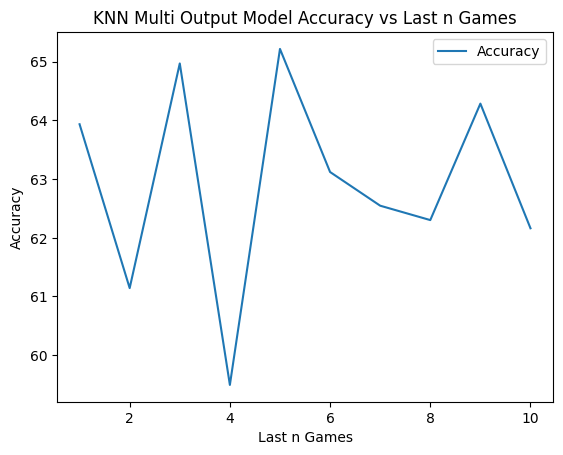

In [119]:
# make a plot of n vs accuracy for the "KNN Multi Output" model with n on y axis and accuracy on x axis
results_df_knn_multi = results_df[results_df["Model Name"] == "KNN Multi Output"].copy()
results_df_knn_multi.sort_values(by=["Last n Games"], ascending=True, inplace=True)

results_df_knn_multi.plot.line(x="Last n Games", y="Accuracy", title="KNN Multi Output Model Accuracy vs Last n Games", xlabel="Last n Games", ylabel="Accuracy")

<Axes: title={'center': 'KNN Home Away Model Accuracy vs Last n Games'}, xlabel='Last n Games', ylabel='Accuracy'>

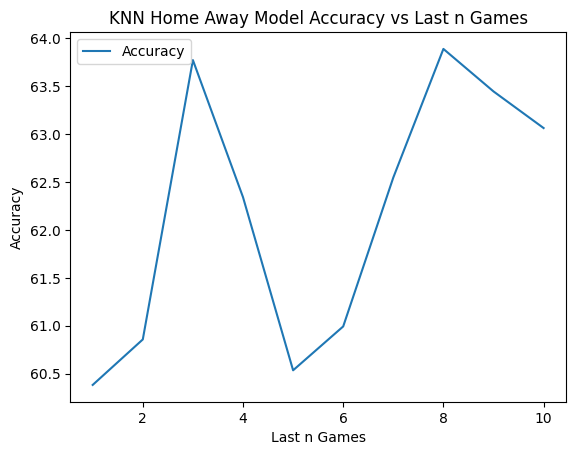

In [120]:
# make a plot of n vs accuracy for the "KNN Home Away" model with n on y axis and accuracy on x axis
results_df_knn_home_away = results_df[results_df["Model Name"] == "KNN Home Away"].copy()
results_df_knn_home_away.sort_values(by=["Last n Games"], ascending=True, inplace=True)

results_df_knn_home_away.plot.line(x="Last n Games", y="Accuracy", title="KNN Home Away Model Accuracy vs Last n Games", xlabel="Last n Games", ylabel="Accuracy")

<Axes: title={'center': 'Linear Regression Model Accuracy vs Last n Games'}, xlabel='Last n Games', ylabel='Accuracy'>

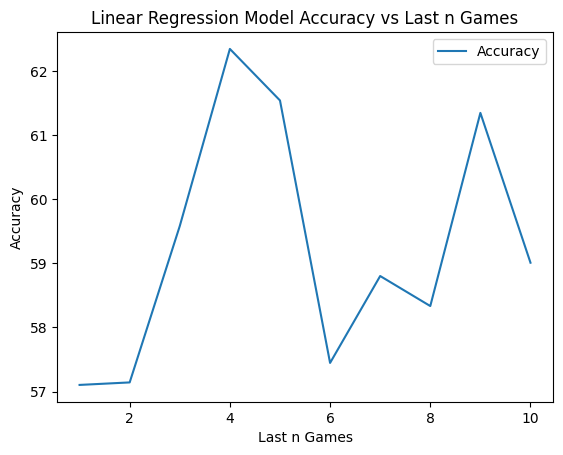

In [121]:
# make a plot of n vs accuracy for the "Linear Regression" model with n on y axis and accuracy on x axis
results_df_lr = results_df[results_df["Model Name"] == "Linear Regression"].copy()
results_df_lr.sort_values(by=["Last n Games"], ascending=True, inplace=True)

results_df_lr.plot.line(x="Last n Games", y="Accuracy", title="Linear Regression Model Accuracy vs Last n Games", xlabel="Last n Games", ylabel="Accuracy")


<Axes: title={'center': 'Ensemble Voting Model Accuracy vs Last n Games'}, xlabel='Last n Games', ylabel='Accuracy'>

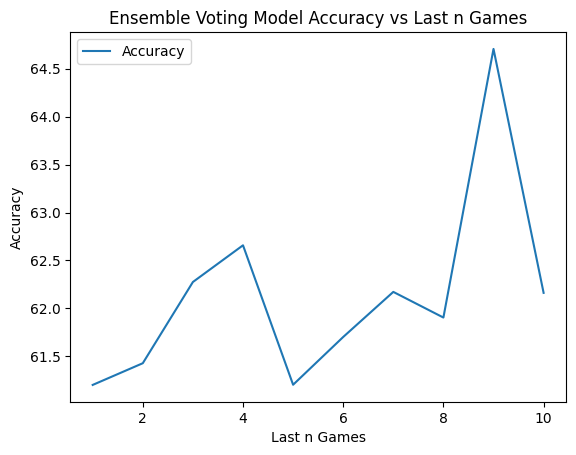

In [122]:
# make a plot of n vs accuracy for the "Ensemble Voting" model with n on y axis and accuracy on x axis
results_df_ensemble = results_df[results_df["Model Name"] == "Ensemble Voting"].copy()
results_df_ensemble.sort_values(by=["Last n Games"], ascending=True, inplace=True)

results_df_ensemble.plot.line(x="Last n Games", y="Accuracy", title="Ensemble Voting Model Accuracy vs Last n Games", xlabel="Last n Games", ylabel="Accuracy")

### Predicting 49ers vs. Seahawks

49ers Last 5:
1. 17 scored, 31 allowed, 460 net yards, 24 first downs, 28:37 t.o.p., 56 total plays, 8.2 avg gain

2. 34 scored, 3 allowed, 437 net yards, 20 first downs, 33:11 t.o.p., 60 total plays, 7.3 avg gain

3. 27 scored, 14 allowed, 420 net yards, 22 first downs, 30:51 t.o.p., 59 total plays, 7.1 avg gain

4. 31 scored, 13 allowed, 377 net yards, 23 first downs, 35:30 t.o.p., 65 total plays, 5.8 avg gain

5. 42 scored, 19 allowed, 456 net yards, 24 first downs, 28:21 t.o.p., 57 total plays, 8.0 avg gain

Average: 30.2 scored, 16.0 allowed, 430.0 net yards, 22.6 first downs, 31:18 t.o.p., 59.4 total plays, 7.3 avg gain

Seahawks Last 5:
1. 3 scored, 37 allowed, 151 net yards, 6 first downs, 19:56 t.o.p., 47 total plays, 3.2 avg gain

2. 29 scored, 26 allowed, 489 net yards, 27 first downs, 30:27 t.o.p., 74 total plays, 6.6 avg gain

3. 16 scored, 17 allowed, 291 net yards, 16 first downs, 32:06 t.o.p., 63 total plays, 4.6 avg gain

4. 13 scored, 31 allowed, 220 net yards, 14 first downs, 24:30 t.o.p., 54 total plays, 4.1 avg gain

5. 35 scored, 41 allowed, 406 net yards, 25 first downs, 23:33 t.o.p., 64 total plays, 6.3 avg gain

Average: 19.2 scored, 30.4 allowed, 311.4 net yards, 17.6 first downs, 26:18 t.o.p., 60.4 total plays, 5.6 avg gain

In [123]:
niners_hawks_last_5 = pd.DataFrame(columns=["home_id", "away_id", "away_last_n_score", "away_last_n_allowed", "away_last_n_time_of_possession", "away_last_n_first_downs",
                                            "away_last_n_total_plays", "away_last_n_avg_gain", "home_last_n_score", "home_last_n_allowed", "home_last_n_time_of_possession",
                                            "home_last_n_first_downs", "home_last_n_total_plays", "home_last_n_avg_gain"])

niners_hawks_last_5 = pd.concat([niners_hawks_last_5, pd.DataFrame({"home_id": "SF", "away_id": "SEA", "away_last_n_score": 19.2, 
                                                                    "away_last_n_allowed": 30.4, "away_last_n_time_of_possession": 26.3, 
                                                                    "away_last_n_first_downs": 17.6, "away_last_n_total_plays": 60.4, 
                                                                    "away_last_n_avg_gain": 5.6, "home_last_n_score": 30.2, "home_last_n_allowed": 16.0, 
                                                                    "home_last_n_time_of_possession": 31.3, "home_last_n_first_downs": 22.6,
                                                                    "home_last_n_total_plays": 59.4, "home_last_n_avg_gain": 7.3}, index=[0])], ignore_index=True)

In [124]:
last_n_games_stats = create_last_n_games_stats_df(5)
box_game_data_merged_last_n = pd.merge(box_game_data_merged, last_n_games_stats, how="inner", left_on=["date", "home_id", "away_id"], right_on=["date", "home_id", "away_id"])
df_prediction = box_game_data_merged_last_n.copy()
df_prediction.dropna(inplace=True)

san_fran_seattle_model = knn_multi_output(df_prediction, 1500)[0]

y_new = pd.DataFrame(
    san_fran_seattle_model.predict(X=niners_hawks_last_5[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=niners_hawks_last_5.index
)

y_new

,0,1
0,22.82,17.58


In [125]:
san_fran_vs_seattle = pd.DataFrame({
    "Date": pd.to_datetime("2023-12-10"),
    "Home_Team": niners_hawks_last_5["home_id"],
    "Away_Team": niners_hawks_last_5["away_id"],
    "Score_Home": 28,
    "Score_Away": 16,
    "Winner_Actual": "SF",
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1],
    "Winner_Pred": "SF"
})

san_fran_vs_seattle

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Winner_Actual,Score_Home_Pred,Score_Away_Pred,Winner_Pred
0,2023-12-10,SF,SEA,28,16,SF,22.82,17.58,SF


### Predicting Eagles vs Cowboys

Eagles Last 5:
1. 38 scored, 31 allowed, 374 net yards, 21 first downs, 28:31 time, 62 total plays, 6.0 avg gain

2. 28 scored, 23 allowed, 292 net yards, 20 first downs, 30:18 time, 59 total plays, 4.9 avg gain

3. 21 scored, 17 allowed, 238 net yards, 16 first downs, 27:59 time, 54 total plays, 4.4 avg gain

4. 37 scored, 34 allowed, 378 net yards, 24 first downs, 26:53 time, 65 total plays, 5.8 avg gain

5. 19 scored, 42 allowed, 333 net yards, 23 first downs, 31:39 time, 69 total plays, 4.8 avg gain



Cowboys Last 5:
1. 23 scored, 28 allowed, 406 net yards, 27 first downs, 29:42 time, 70 total plays, 5.8 avg gain

2. 49 scored, 17 allowed, 640 net yards, 32 first downs, 37:21 time, 77 total plays, 8.3 avg gain

3. 33 scored, 10 allowed, 311 net yards, 23 first downs, 31:21 time, 68 total plays, 4,6 avg gain

4. 45 scored, 10 allowed, 431 net yards, 21 first downs, 23:06 time, 50 total plays, 8.6 avg gain

5. 41 scored, 35 allowed, 411 net yards, 33 first downs, 36:27 time, 79 total plays, 5.2 avg gain

Average: 38.2 scored, 20.0 allowed, 440.0 net yards, 27.2 first downs, 31:21 time, 68.8 total plays, 6.9 avg gain

In [126]:
eagles_cowboys_last_5 = pd.DataFrame(columns=["home_id", "away_id", "away_last_n_score", "away_last_n_allowed", "away_last_n_time_of_possession", "away_last_n_first_downs",
                                            "away_last_n_total_plays", "away_last_n_avg_gain", "home_last_n_score", "home_last_n_allowed", "home_last_n_time_of_possession",
                                            "home_last_n_first_downs", "home_last_n_total_plays", "home_last_n_avg_gain"])

eagles_cowboys_last_5 = pd.concat([eagles_cowboys_last_5, pd.DataFrame({"home_id": "DAL", "away_id": "PHI", "away_last_n_score": 28.6,
                                                                        "away_last_n_allowed": 29.4, "away_last_n_time_of_possession": 29.2,
                                                                        "away_last_n_first_downs": 20.8, "away_last_n_total_plays": 61.8,
                                                                        "away_last_n_avg_gain": 5.4, "home_last_n_score": 38.2,
                                                                        "home_last_n_allowed": 20.0, "home_last_n_time_of_possession": 31.2,
                                                                        "home_last_n_first_downs": 27.2, "home_last_n_total_plays": 68.8,
                                                                        "home_last_n_avg_gain": 6.9}, index=[0])], ignore_index=True)

In [127]:
dal_philly_model = knn_multi_output(df_prediction, 1500)[0]

y_new = pd.DataFrame(
    dal_philly_model.predict(X=eagles_cowboys_last_5[['home_id', 'away_id', 'away_last_n_score', 'away_last_n_allowed', 'away_last_n_time_of_possession', 'away_last_n_first_downs', 
                                                          'away_last_n_total_plays', 'away_last_n_avg_gain', 'home_last_n_score', 'home_last_n_allowed', 
                                                          'home_last_n_time_of_possession', 'home_last_n_first_downs', 'home_last_n_total_plays', 'home_last_n_avg_gain']]),
    index=eagles_cowboys_last_5.index
)

y_new

,0,1
0,27.06,24.68


In [128]:
pred_winner = "DAL" if y_new[0][0] > y_new[1][0] else "PHI" if y_new[0] < y_new[1] else "TIE"

dal_vs_philly = pd.DataFrame({
    "Date": pd.to_datetime("2023-12-10"),
    "Home_Team": eagles_cowboys_last_5["home_id"],
    "Away_Team": eagles_cowboys_last_5["away_id"],
    "Score_Home": 33,
    "Score_Away": 13,
    "Winner_Actual": "DAL",
    "Score_Home_Pred": y_new[0],
    "Score_Away_Pred": y_new[1],
    "Winner_Pred": pred_winner
})

dal_vs_philly

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Winner_Actual,Score_Home_Pred,Score_Away_Pred,Winner_Pred
0,2023-12-10,DAL,PHI,33,13,DAL,27.06,24.68,DAL


### Visualizing Accuracies

In [129]:
def point_dif(home_score, away_score):
  if abs(home_score - away_score) > 7:
    return "Blowout"
  else:
    return "Close Game"
  
pred_vs_actual_knr["Point_Dif"] = pred_vs_actual_knr.apply(lambda x: point_dif(x["Score_Home"], x["Score_Away"]), axis=1)
# pred_vs_actual_knr[['Score_Home', 'Score_Away']].apply(point_dif, axis=1) # error here: point_dif() missing 1 required positional argument: 'away_score'
pred_vs_actual_knr["Point_Dif"].value_counts()  

Blowout       154
Close Game    145
Name: Point_Dif, dtype: int64

In [130]:
# add column to pred_vs_actual_knr to show if prediction was correct or not
pred_vs_actual_knr["Correct_Pred"] = pred_vs_actual_knr.apply(lambda x: "Correct" if x["Winner_Pred"] == x["Winner_Id"] else "Incorrect", axis=1)
pred_vs_actual_knr.head()

,Date,Home_Team,Away_Team,Score_Home,Score_Away,Score_Home_Pred,Score_Away_Pred,Winner_Id,Winner_Pred,Point_Dif,Correct_Pred
1618,2016-09-18,DEN,IND,34,20,25.84,21.32,0,0,Blowout,Correct
1619,2016-09-18,MIN,GB,17,14,23.64,23.76,0,1,Close Game,Incorrect
1620,2016-09-18,LVR,ATL,28,35,23.24,26.70,1,1,Close Game,Correct
1621,2016-09-18,ARI,TB,40,7,24.28,20.46,0,0,Blowout,Correct
1622,2016-09-18,WAS,DAL,23,27,23.30,24.08,1,1,Close Game,Correct


In [131]:
joint_dif_acc = pd.crosstab(pred_vs_actual_knr["Point_Dif"], pred_vs_actual_knr["Correct_Pred"], normalize=True)
marginal_dif = joint_dif_acc.sum(axis=1)
cond_dif_acc = joint_dif_acc.divide(marginal_dif, axis=0)
cond_dif_acc

Correct_Pred,Correct,Incorrect
Point_Dif,,
Blowout,0.707792,0.292208
Close Game,0.593103,0.406897


<Axes: xlabel='Point_Dif'>

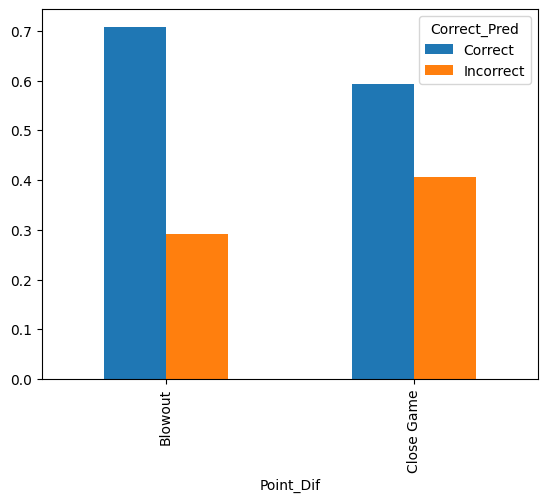

In [132]:
cond_dif_acc.plot.bar()